# Final Project
# MA2151 - Simulasi dan Komputasi Matematika 
## Contagious Spreading of Stomach Virus

- Sulaiman - 10119049
- Charlie RE. - 10119051
- Tasha M. Pohan - 10119115
- Hieronimus Jevon Valerian. - 10819017
- Nayla Frisly M. - 10819027

In [1]:
# Konstanta global

ROWS = 25
COLS = 25

### 1. Fungsi Inisialisasi Sistem

***init_grid(r, c, probS, probI)***

Function to return an $r$ x $c$ grid of values SUSCEPTIBLE, INFECTIOUS, or IMMUNE where probS is probability that someone become Susceptible and probI is probability that someone become Infectious.

***Pre:*** 
- $r$ is the row size of the grid and $c$ is the column size of the grid where $r$, $c$ are positive.
- *probS* is the probability that someone become SUSCEPTIBLE.
- *probI* is the probability that someone become INFECTIOUS
- *''matrix''* is a $r$ x $c$ matrix with each element contains zero values.

***Post:***
- A grid as with three types of human status in each element in *''matrix''* as described earlier was returned

***Algorithm:***
  ```
  for i from 1 to r do
    for j from 1 to c do
      rand_1 := generate random number in range [0,1)
      rand_2 := generate random number in range [0,1)

      if rand_1 < probS then
        matrix[i, j] = 0        //susceptible individual

      else if rand_2 < probI then
        rand_3 := generate random number between 1 and 2
        matrix[i, j] := rand_3  //infectious individual

      else
        rand_3 := generate random number among [3,4,5,6,7]
        matrix[i, j] := rand_3  //immune individual

  return matrix
  ```

In [2]:
#Deklarasi fungsi untuk menginisialisasi sistem pada grid

#row = ukuran baris pada matriks (dalam proyek ini, row = 25)
#col = ukuran kolom pada matriks (dalam proyek ini, col = 25)
#probS = probability Susceptible (peluang seseorang susceptible)
#probI = probability Infectious (peluang seseorang infectious)

import random

def init_grid(r, c, probS, probI):    
    #Deklarasi matriks "matrix" tempat menyimpan hasil inisialisasi
    matrix = [[0 for j in range(c)] for i in range(r)]
    
    for i in range(r):
        for j in range(c):
            rand_1 = random.random()
            rand_2 = random.random()
            
            if rand_1 < probS:
                matrix[i][j] = 0       #susceptible individual
            elif rand_2 < probI:
                rand_3 = random.choice([1,2]) #memilih secara acak antara angka 1 atau 2
                                              #yang menyatakan lama hari mereka telah terinfeksi
                matrix[i][j] = rand_3  #infectious individual
            else:
                rand_3 = random.choice([3,4,5,6,7]) #memilih secara acak antara angka 3 - 7
                                                    #yang menyatakan durasi hari mereka telah immune
                matrix[i][j] = rand_3  #immune individual
            
    return matrix

In [3]:
#Warna untuk sel selular automata

import matplotlib.colors as mc
import matplotlib.pyplot as plt

coldict = {"red": ((0, 0, 0), (0.14, 0.8, 0.8), (0.14, 0, 0), (0.42, 0.8, 0.8), (0.42, 1, 1), (1, 1, 1)),
           "green": ((0, 1, 1), (0.14, 1, 1), (0.14, 0, 0), (0.42, 0.8, 0.8), (0.42, 0, 0), (1, 0.8, 0.8)), 
           "blue": ((0, 0, 0), (0.14, 0.8, 0.8), (0.14, 1, 1), (0.42, 1, 1), (0.42, 0, 0), (1, 0.8, 0.8))}
colmap = mc.LinearSegmentedColormap("tubes", coldict)
plt.register_cmap(cmap=colmap)

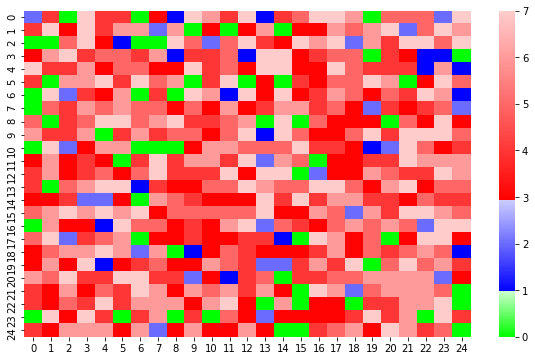

In [4]:
#Import library
import seaborn as sns

#UJI COBA (Tidak berhubungan dengan percobaan simulasi yang akan dilakukan di bagian akhir)
mat = init_grid(ROWS, COLS, 0.1, 0.1)
fig = plt.figure(figsize=(10, 6))
sns.heatmap(mat, cmap="tubes")
plt.show()

### 2. Fungsi Kondisi Batas

***reflect_bound(matrix)***

Function to return an extended matrix from *''matrix''* by implementing reflect boundary condition.

***Pre:***
- *''matrix''* is a $r$ x $c$ matrix with each grid contains one of SUSCEPTIBLE, INFECTIOUS or IMMUNE individual that is represented with 0, [1,2], and [3,4,5,6,7].

***Post:***
- *''matrix_ext''* which is a grid extended one cell in each direction with reflect boundary condition was returned.

***Algorithm:***
  ```
  matrix_ext := declare matrix with extended one cell in each direction from "matrix" with each element contains zero value.

  for i from 2 to r+1 do
    for j from 2 to c+1 do
      matrix_ext[i, j] := matrix[i-1, j-1]

  for j from 2 to c+1 do
    matrix_ext[1, j] := matrix_ext[2, j]
    matrix_ext[r+2, j] := matrix_ext[r+1, j]

  for k from 1 to r+2 do
    matrix_ext[k, 1] := matrix_ext[k, 2]
    matrix_ext[k, c+2] := matrix_ext[k, c+1]

  return matrix_ext 
  ```

In [5]:
#Pada proyek kali ini, kami menggunakan "Reflecting Boundary Condition" dengan
#asumsi bahwa kondisi seorang individual dipengaruhi oleh orang disekitarnya.
#Sehingga, kemungkinan besar kondisi individual tersebut sama dengan orang yang
#berada di sebelahnya.

#Deklarasi fungsi reflect_bound untuk memberikan kondisi batas pada matriks
def reflect_bound(matrix):
    r, c = ROWS, COLS
    
    #Deklarasi matriks dengan ukuran yang telah diperluas dari matriks "matrix"
    matrix_ext = [[0 for j in range(c+2)] for i in range(r+2)]
    
    #Looping untuk mengisi bagian dalam dari matriks "matrix_ext" yang mana
    #sama dengan matriks "matrix"
    for i in range(1, r+1):
        for j in range(1, c+1):
            matrix_ext[i][j] = matrix[i-1][j-1]
    
    #Looping untuk mengisi bagian luar (kulit) dari matriks "matrix_ext"
    for j in range(1, c+1):
        matrix_ext[0][j] = matrix_ext[1][j]
        matrix_ext[r+1][j] = matrix_ext[r][j]
    
    for k in range(r+2):
        matrix_ext[k][0] = matrix_ext[k][1]
        matrix_ext[k][c+1] = matrix_ext[k][c]
        
    return matrix_ext

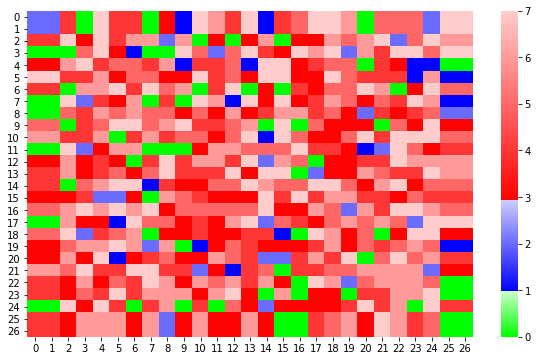

In [6]:
#UJI COBA
mat_ext = reflect_bound(mat)

fig = plt.figure(figsize=(10, 6))
sns.heatmap(mat_ext, cmap="tubes")
plt.show()

### 3. Fungsi Penyebaran Stomach Virus

***spread(matrix_ext)***

Function to return a grid in a simulation of the spread of disease that some of the element in the grid might be change from the previous condition.

***Pre:***
- *''matrix_ext''* a grid that is extended one cell in each direction from *''matrix''* with reflect boundary condition.

***Post:***
- *''matrix_ext''* with renewal of conditions on several elements in accordance with the applicable transition rules.

***Algorithm:***
  ```
  for i from 2 to r-1 do
    for j from 2 to c-1 do
      if matrix_ext[i, j] == 0 then
        neighbor := [matrix_ext[i-1, j], matrix_ext[i, j+1], 
                    matrix_ext[i+1, j], matrix_ext[i, j-1]]
      
        if (1 in neighbor) OR (2 in neighbor) then
          matrix[i, j] := 1   //first day become infectious
      
      else if 1 <= matrix_ext[i, j] <= 6 do
        matrix_ext[i, j] := matrix_ext[i, j] + 1
      
      else if matrix_ext[i, j] == 7 then  //last day as an immune individual
        matrix_ext[i, j] := 0  //back into susceptible individual
  ```

In [7]:
#Fungsi spread untuk meng-update matrix_ext
def spread(matrix_ext):
    r, c = ROWS+2, COLS+2
    #Looping untuk memperbaharui kondisi/status setiap individu pada grid
    for i in range(1, r-1):
        for j in range(1, c-1):
            if matrix_ext[i][j] == 0:
                #Ketetanggaan yang digunakan adalah ketetangaan "Von Neumann"
                neighbor = [matrix_ext[i-1][j], matrix_ext[i][j+1],
                            matrix_ext[i+1][j], matrix_ext[i][j-1]]
                
                if (1 in neighbor) or (2 in neighbor):
                    matrix_ext[i][j] = 1 #hari pertama terinfeksi
            
            elif 1 <= matrix_ext[i][j] <= 6:
                #update lama hari terinfeksi / immune
                matrix_ext[i][j] = matrix_ext[i][j] + 1
            
            elif matrix_ext[i][j] == 7: #hari terakhir immune
                matrix_ext[i][j] = 0    #kembali menjadi susceptible

### 4. Simulasi

***Simulation Algorithm of Spread of Stomach Virus***

***Initialize:***
- *probSusceptibleList* is a list of probS that will be tried in the simulation
- *probInfectiousList* is a list of probI that will be tried in the simulation
- *simulation_length*
- *list_spread* is a 9 x 9 matrix with each element contains a condition from every single iteration for each probS and probI.
- *rows*, *cols* are the size of *''matrix''*.

***Algorithm:***
  ```
  for i from 1 to length(probSusceptibleList) do
    for j from 1 to length(probInfectiousList) do
      probSusceptible := probSusceptibleList[i]
      probInfectious := probInfectiousList[j]

      //Inisialisasi Sistem
      spread_mat := init_grid(rows, cols, probSusceptible, probInfectious)
      add the spread_mat onto list_spread[i, j]

      stop := FALSE
      //Proses Penyebaran Virus
      k := 0

      while (k < simulation_length) AND NOT stop do
        spread_mat_ext := list of reflect_bound(spread_mat)
        spread(spread_mat_ext)
        add spread_mat_ext onto list_spread[i, j]

        //Update Kondisi untuk Setiap Elemen di spread_mat
        stop := TRUE
        for l from 1 to rows do
          for m from 1 to cols do
            spread_mat[l, m] := spread_mat[l+1, m+1]

            if stop then
              if spread_mat[l, m] then  //Jika belum semua SUSCEPTIBLE, loop berlanjut
                stop := FALSE
        
        k := k + 1
  ```

In [8]:
import numpy as np

def simulasi(probSusceptibleList, probInfectiousList, sim_len):
    #Deklarasi matriks tempat menyimpan hasil setiap iterasi untuk setiap peluang probSusceptible dan probInfectious
    #Matriks yang setiap elemennya berupa list of matrix
    # - Baris pada matriks menyatakan probSusceptible
    # - Kolom pada matriks menyatakan probInfectious
    list_spread = [[[] for j in range(len(probInfectiousList))] for i in range(len(probSusceptibleList))]

    #Ukuran baris dan kolom matriks
    rows = ROWS
    cols = COLS

    #Simulasi untuk masing-masing peluang probSusceptible dan probInfectious
    for i in range(len(probSusceptibleList)):
        for j in range(len(probInfectiousList)):
            probSusceptible = probSusceptibleList[i]
            probInfectious = probInfectiousList[j]
            
            #Inisialisasi Sistem
            spread_mat = init_grid(rows, cols, probSusceptible, probInfectious)
            list_spread[i][j].append([[spread_mat[i][j] for j in range(cols)] for i in range(rows)])
            
            stop = False
            #Iterasi sebanyak sim_len kali (atau sudah semuanya susceptible)
            k = 0
            while k < sim_len and not stop:
                spread_mat_ext = np.array(reflect_bound(spread_mat))   #Inisialisasi kondisi batas
                spread(spread_mat_ext)      #Aturan transisi
                list_spread[i][j].append(spread_mat_ext[1:-1, 1:-1]) #Menambahkan hasil iterasi ke dalam list_spread (25x25)
                
                #Looping untuk mengupdate kondisi setipa elemen pada "spread_mat" karena akan digunakan kembali sebagai input
                #pada fungsi "reflect_bound" di iterasi berikutnya
                stop = True
                for l in range(rows):
                    for m in range(cols):
                        spread_mat[l][m] = spread_mat_ext[l+1][m+1]
                        if stop:
                            if spread_mat[l][m]:  #Jika masih belum semua susceptible maka loop berlanjut
                                stop = False
                k = k + 1
    return list_spread

### 5. Visualisasi hasil (animasi, frames animasi, grafik)

***showanim(probS, probI)***

***Pre:***
- *probS* is the probability that someone become SUSCEPTIBLE
- *probI* is the probability that someone become INFECTIOUS

***Post:***
- An animation for the spreading of stomach virus process for each probS and probI.

***Algorithm:***
```
x := INT(probS / 0.1) - 1
y := INT(probI / 0.1) - 1
t := length(list_spread[x, y])

animate all the conditions in each element for each iteration process that lasts t times
```

In [9]:
from matplotlib import rc
from IPython.display import HTML
rc('animation', html='jshtml')

In [10]:
#List peluang yang akan digunakan pada probSusceptible dan probInfectious
probSusceptibleList = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
probInfectiousList = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

list_spread = simulasi(probSusceptibleList, probInfectiousList, 50)

In [11]:
#Display animasi untuk probSusceptible = 0.1 dan probInfectious = 0.1
import matplotlib.animation as animation

def showanim(probS, probI):
    #Menyiapkan figure, heatmap
    fig = plt.figure(figsize=(7, 6))
    #Lokasi indeks list_spread untuk probSusceptible = probS, probInfectious = probI
    x, y = int(probS/0.1) - 1, int(probI/0.1) - 1
    t = len(list_spread[x][y])

    #Fungsi animate
    def animate(i):
        plt.clf()
        ax = sns.heatmap(list_spread[x][y][i], cmap="tubes", vmin=0, vmax=7)
        if (i == t-1):
            plt.close()
        return None

    #Fungsi init
    def init():
        plt.clf()
        ax = sns.heatmap(list_spread[x][y][0], cmap="tubes", vmin=0, vmax=7)
        return None

    #Func Animation
    global anim
    anim = animation.FuncAnimation(fig, animate, frames=range(t),
                                  interval=200, init_func=init)

In [12]:
def grafik(probS, probI):

    x, y = int(probS/0.1)-1, int(probI/0.1)-1
    t = len(list_spread[x][y])
    rows, cols = ROWS, COLS
    susceptible = [0 for i in range(t)]
    infected = [0 for i in range(t)]
    immune = [0 for i in range(t)]
    
    for i in range(t):
        sus_temp = inf_temp = imm_temp = 0
        for a in range(rows):
            for b in range(cols):
                if list_spread[x][y][i][a][b] == 0:
                    sus_temp += 1
                elif list_spread[x][y][i][a][b] in range(1, 3):
                    inf_temp += 1
                else:
                    imm_temp += 1
        susceptible[i] = sus_temp
        infected[i] = inf_temp
        immune[i] = imm_temp

    fig = plt.figure(figsize=(7,6))    
    days = [i for i in range(1, t+1)]
    plt.ylim(0, 625)
    plt.plot(days, susceptible, color='g', label="Susceptible")
    plt.plot(days, infected, color='b', label="Infected")
    plt.plot(days, immune, color='r', label="Immune")
    plt.xlabel("Hari ke-")
    plt.ylabel("Banyak penyebaran")
    plt.legend()
    plt.show()

In [13]:
from math import ceil
def drawall(probS, probI, step=1):

    x, y = int(probS/0.1)-1, int(probI/0.1)-1
    t = len(list_spread[x][y])
    nrows = ceil(((t-1)//step + 1)/5)
    fig, axes = plt.subplots(ncols=5, nrows=nrows, figsize=(25, 4*nrows))
    for i in range(nrows):
        for j in range(5):
            try:
                sns.heatmap(list_spread[x][y][(5*i+j)*step], cmap="tubes", ax=axes[i][j])
            except IndexError:
                for k in range(j, 5):
                    fig.delaxes(axes[i][k])
                break
            axes[i][j].set_title(f"t = {(5*i+j)*step+1}")
    plt.show()

In [14]:
showanim(0.4, 0.2)
anim

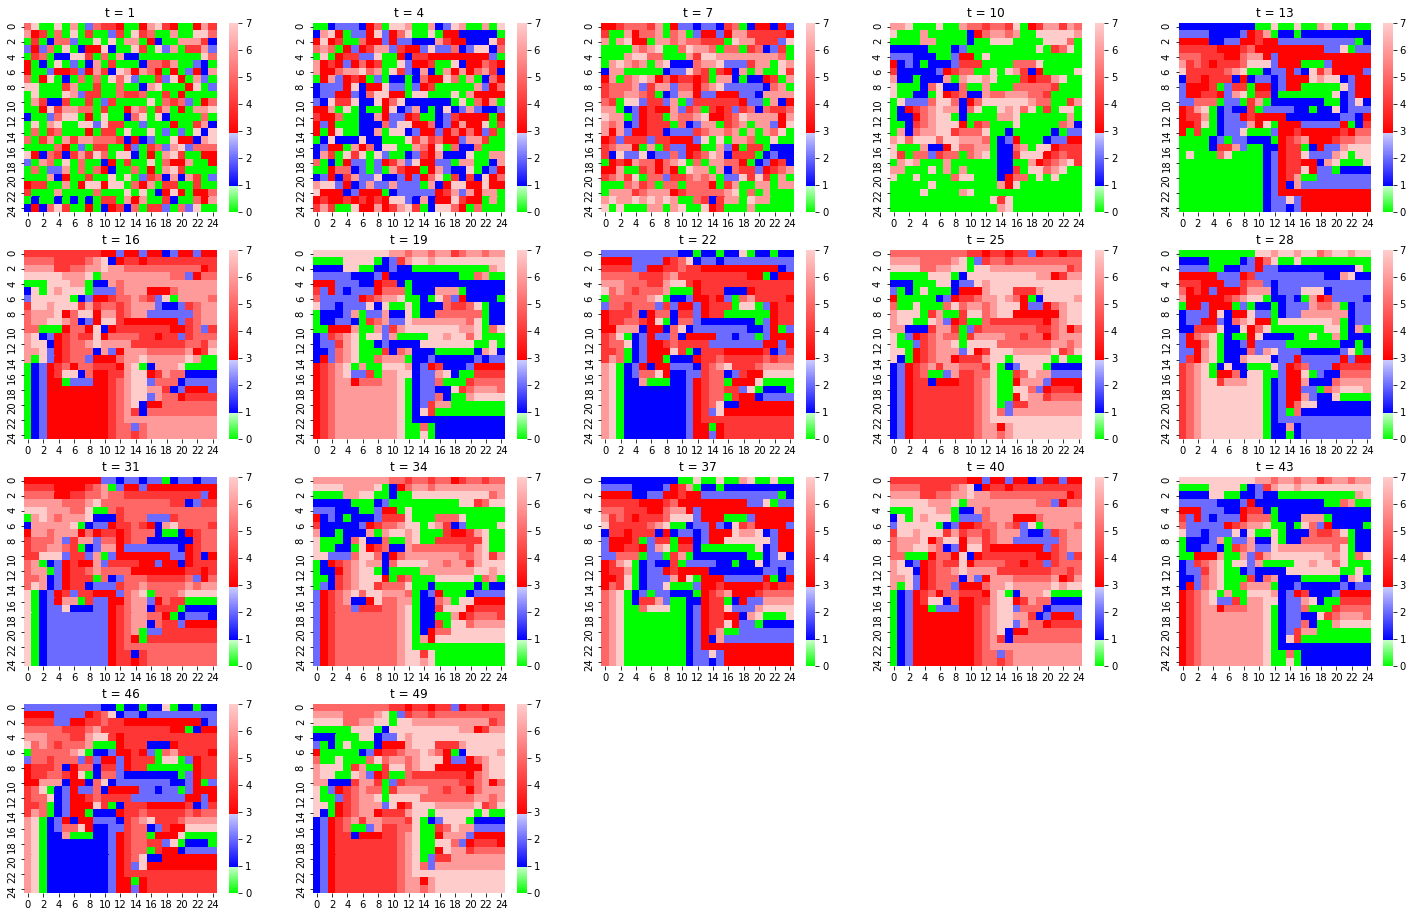

In [15]:
drawall(0.4, 0.2, step=3)

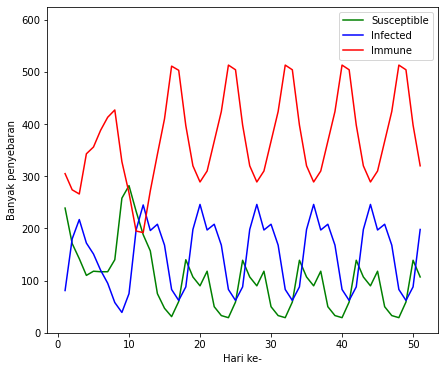

In [16]:
grafik(0.4, 0.2)

# Analisis

## Banyaknya hari penyebaran

In [17]:
probSusceptibleList = [i/10 for i in range(1, 10)]
probInfectiousList = [i/10 for i in range(1, 10) for j in range(10)]

list_spread2 = simulasi(probSusceptibleList, probInfectiousList, 50)

In [18]:
avcount = [[sum([len(list_spread2[i][j]) for j in range(k, k+10)])/10
            for k in range(0, 90, 10)] for i in range(9)]
print(avcount)

[[51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 43.3, 19.5], [51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 27.7, 19.8], [51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 47.2, 31.8, 15.6], [51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 47.2, 23.9, 19.3], [51.0, 51.0, 51.0, 47.5, 51.0, 47.2, 43.4, 20.0, 15.6], [51.0, 51.0, 51.0, 51.0, 47.2, 39.5, 39.5, 20.3, 19.6], [51.0, 36.3, 43.7, 39.7, 36.0, 39.7, 24.0, 19.9, 15.8], [31.0, 36.2, 40.1, 35.8, 20.9, 24.4, 16.4, 11.9, 11.4], [20.2, 22.0, 14.4, 14.3, 16.5, 12.6, 13.8, 11.9, 11.8]]


In [19]:
import pandas as pd

x = [i/10 for i in range(1, 10) for j in range(9)]
y = [i/10 for j in range(9) for i in range(1, 10)]
avcount_flat = [val for subset in avcount for val in subset]
df = pd.DataFrame({'probS': x, 'probI': y, 'size': avcount_flat})

In [20]:
df.head(20)

,probS,probI,size
0,0.1,0.1,51.0
1,0.1,0.2,51.0
2,0.1,0.3,51.0
3,0.1,0.4,51.0
4,0.1,0.5,51.0
5,0.1,0.6,51.0
6,0.1,0.7,51.0
7,0.1,0.8,43.3
8,0.1,0.9,19.5
9,0.2,0.1,51.0


In [21]:
df.to_csv("LAMPIRAN TABEL 1.csv")

In [22]:
df.to_excel("LAMPIRAN TABEL 1.xlsx")

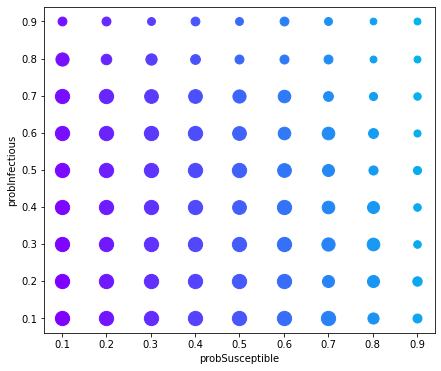

'\nplt.figure(figsize=(7,6))\nplt.scatter(\'probS\', \'probI\', data=df, s=df[\'size\']*4)\nplt.xlabel("probSusceptible")\nplt.ylabel("probInfectious")\nplt.show()\n'

In [23]:
# plot probS terhadap probI
# plot probS terhadap probI
import matplotlib.cm as cm

plt.figure(figsize=(7,6))     

colors = cm.rainbow(np.linspace(0, 0.25, len(df["probI"])))

for x, y, c, size in zip(df["probS"], df["probI"], colors, df["size"]):
    plt.scatter(x, y, color=c, s=size*4)

plt.xlabel("probSusceptible")
plt.ylabel("probInfectious")
plt.show()

'''
plt.figure(figsize=(7,6))
plt.scatter('probS', 'probI', data=df, s=df['size']*4)
plt.xlabel("probSusceptible")
plt.ylabel("probInfectious")
plt.show()
'''

## Kemunculan pola periodik

In [24]:
probSusceptibleList = [i/10 for i in range(1, 10)]
probInfectiousList = [i/10 for i in range(1, 10) for j in range(10)]

list_spread3 = simulasi(probSusceptibleList, probInfectiousList, 200)

In [25]:
pericount = [[sum([1 for j in range(k, k+10) if len(list_spread3[i][j])==201]) for k in range(0, 90, 10)] for i in range(9)]
print(pericount)

[[10, 10, 10, 10, 10, 10, 7, 5, 2], [10, 10, 10, 10, 10, 10, 10, 6, 2], [10, 10, 10, 10, 10, 10, 9, 2, 1], [10, 10, 10, 10, 10, 10, 10, 3, 1], [10, 10, 10, 10, 10, 10, 10, 5, 1], [10, 10, 10, 10, 9, 8, 6, 4, 0], [10, 10, 9, 6, 8, 8, 2, 3, 1], [8, 7, 2, 2, 5, 3, 0, 0, 0], [0, 0, 3, 0, 0, 0, 0, 1, 0]]


In [26]:
x = [i/10 for i in range(1, 10) for j in range(9)]
y = [i/10 for j in range(9) for i in range(1, 10)]
pericount = [val*10 for subset in pericount for val in subset]
df = pd.DataFrame({'probS': x, 'probI': y, 'periodic_count (persen)': pericount})

In [27]:
df.head(20)

,probS,probI,periodic_count (persen)
0,0.1,0.1,100
1,0.1,0.2,100
2,0.1,0.3,100
3,0.1,0.4,100
4,0.1,0.5,100
5,0.1,0.6,100
6,0.1,0.7,70
7,0.1,0.8,50
8,0.1,0.9,20
9,0.2,0.1,100


In [28]:
df.to_csv("LAMPIRAN TABEL 2.csv")

In [29]:
df.to_excel("LAMPIRAN TABEL 2.xlsx")

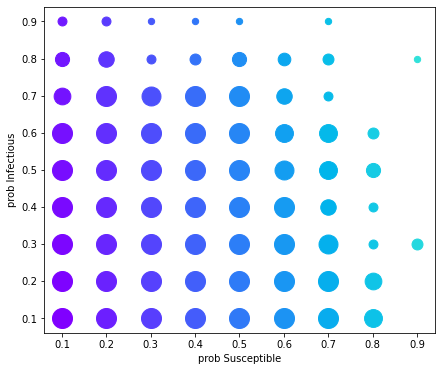

In [30]:
import matplotlib.cm as cm

plt.figure(figsize=(7,6))     

colors = cm.rainbow(np.linspace(0, 0.35, len(df["probI"])))

for x, y, c, size in zip(df["probS"], df["probI"], colors, df["periodic_count (persen)"]):
    plt.scatter(x, y, color=c, s=size*4)

#plt.figure(figsize=(7,6))
#plt.scatter('probS', 'probI', s=df['periodic_count (persen)']*2, data=df)
plt.xlabel("prob Susceptible")
plt.ylabel("prob Infectious")
plt.show()

## Peranan get_infected

In [31]:
def get_infected(x, y, list_spread, graph=True):
    # Keluarkan data get_infected dan tampilkan grafiknya
    # list_spread disini variabel lokal
    # x dan y menunjukkan index pada list

    t = len(list_spread[x][y])
    rows, cols = ROWS, COLS
    get_infected = [0 for i in range(t-1)]

    for i in range(t-1):
        count = 0
        for a in range(rows):
            for b in range(cols):
                if (list_spread[x][y][i+1][a][b], list_spread[x][y][i][a][b]) == (1, 0):
                    count += 1
        get_infected[i] = count

    if graph:
        plt.figure(figsize=(7,6))
        days = [i for i in range(1, t)]
        plt.plot(days, get_infected)
        plt.xlabel("Hari ke-")
        plt.ylabel("Banyaknya kasus (infected) baru")
        plt.show()
    
    return get_infected

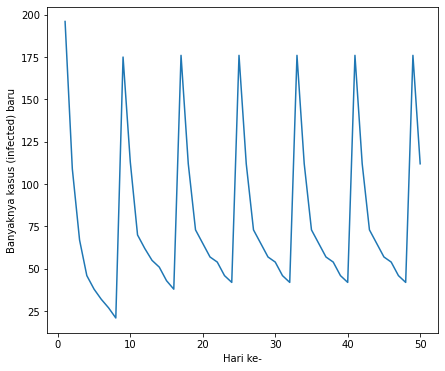

In [32]:
probS, probI = 0.5, 0.3
x, y = int(probS/0.1)-1, int(probI/0.1)-1
coba = get_infected(x, y, list_spread)

**Hipotesis**:  bila get_infected di suatu hari (selain hari pertama) naik drastis (5% populasi), maka penyebaran pasti periodik dan tidak pernah berakhir

Dapat diverifikasi di sini untuk populasi = 25x25 = 625

In [33]:
def biggest_jump(series, populasi=ROWS*COLS):
    n = len(series)
    return round(max([series[i+1] - series[i] for i in range(n-1)]) / populasi, 4)

In [34]:
biggest_jump(coba)

0.2464

In [35]:
# pakai simulasi yang berdurasi panjang (sim_len=200) dan tiap prob diulangi 10x
jumps = [[biggest_jump(get_infected(i, j, list_spread3, graph=False)) 
        for j in range(90)] for i in range(9)]
periodicities = [[True if len(list_spread3[i][j])==201 else False 
                  for j in range(90)] for i in range(9)]

In [36]:
jumps_flat = [val for subset in jumps for val in subset]
periods_flat = [val for subset in periodicities for val in subset]
probS_flat = [i/10 for i in range(1, 10) for j in range(9) for k in range(10)]
probI_flat = [i/10 for j in range(9) for i in range(1, 10) for k in range(10)]

In [37]:
jumpsxperiod = pd.DataFrame({'probS': probS_flat, 'probI': probI_flat, 
                             'biggest jumps': jumps_flat, 'is periodic?': periods_flat})
jumpsxperiod.head(20)

,probS,probI,biggest jumps,is periodic?
0,0.1,0.1,0.2496,True
1,0.1,0.1,0.1344,True
2,0.1,0.1,0.2576,True
3,0.1,0.1,0.1424,True
4,0.1,0.1,0.1056,True
5,0.1,0.1,0.2064,True
6,0.1,0.1,0.1840,True
7,0.1,0.1,0.2224,True
8,0.1,0.1,0.2016,True
9,0.1,0.1,0.1424,True


In [38]:
jumpsxperiod.to_csv("LAMPIRAN TABEL 3.csv")

In [39]:
jumpsxperiod.to_excel("LAMPIRAN TABEL 3.xlsx")

In [40]:
pivot1 = jumpsxperiod.loc[jumpsxperiod['is periodic?'] == True].loc[:, 'biggest jumps'].min()
pivot2 = jumpsxperiod.loc[jumpsxperiod['is periodic?'] == False].loc[:, 'biggest jumps'].max()
print(pivot1, pivot2)

0.0208 0.0256


In [41]:
ntrue = len(jumpsxperiod.loc[jumpsxperiod['is periodic?'] == True])
prob1 = len(jumpsxperiod.loc[jumpsxperiod['is periodic?'] == True
                             ].loc[jumpsxperiod['biggest jumps'] < pivot1]) / ntrue
prob2 = len(jumpsxperiod.loc[jumpsxperiod['is periodic?'] == True
                             ].loc[jumpsxperiod['biggest jumps'] < pivot2
                                   ].loc[jumpsxperiod['biggest jumps'] >= pivot1]) / ntrue
prob3 = len(jumpsxperiod.loc[jumpsxperiod['is periodic?'] == True
                             ].loc[jumpsxperiod['biggest jumps'] >= pivot2]) / ntrue
print(prob1, prob2, prob3)

0.0 0.005671077504725898 0.994328922495274


In [42]:
nfalse = len(jumpsxperiod.loc[jumpsxperiod['is periodic?'] == False])
prob4 = len(jumpsxperiod.loc[jumpsxperiod['is periodic?'] == False
                             ].loc[jumpsxperiod['biggest jumps'] <= pivot1]) / nfalse
prob5 = len(jumpsxperiod.loc[jumpsxperiod['is periodic?'] == False
                             ].loc[jumpsxperiod['biggest jumps'] <= pivot2
                                   ].loc[jumpsxperiod['biggest jumps'] > pivot1]) / nfalse
prob6 = len(jumpsxperiod.loc[jumpsxperiod['is periodic?'] == False
                             ].loc[jumpsxperiod['biggest jumps'] > pivot2]) / nfalse
print(prob4, prob5, prob6)

0.9928825622775801 0.0071174377224199285 0.0


In [43]:
len(jumpsxperiod.loc[jumpsxperiod['biggest jumps'] <= pivot2].loc[jumpsxperiod['biggest jumps'] >= pivot1])

5

In [44]:
len(jumpsxperiod.loc[jumpsxperiod['is periodic?'] == False])

281

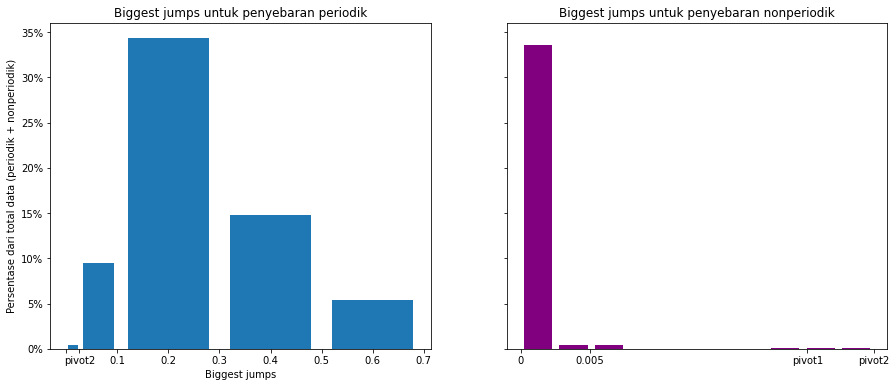

In [45]:
import matplotlib.ticker as mtick

data1 = jumpsxperiod.loc[jumpsxperiod['is periodic?'] == True]['biggest jumps']
data2 = jumpsxperiod.loc[jumpsxperiod['is periodic?'] == False]['biggest jumps']
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15, 6))

ndata = len(jumpsxperiod)
weights1 = [1/ndata for i in range(len(data1))]
weights2 = [1/ndata for i in range(len(data2))]

ax0.yaxis.set_major_formatter((mtick.PercentFormatter(xmax=1.0, decimals=0)))
ax0.set_xticks([0, pivot2, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
ax0.set_xticklabels(["", "pivot2", 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
ax0.hist(data1, rwidth=0.8, bins=[0, pivot2, 0.1, 0.3, 0.5, 0.7], weights=weights1)
ax0.set_title("Biggest jumps untuk penyebaran periodik")
ax0.set_xlabel("Biggest jumps")
ax0.set_ylabel("Persentase dari total data (periodik + nonperiodik)")

ax1.set_xticks([0, 0.005, pivot1, pivot2])
ax1.set_xticklabels([0, 0.005, "pivot1", "pivot2"])
ax1.hist(data2, rwidth=0.8, weights=weights2, color='purple')
ax1.set_title("Biggest jumps untuk penyebaran nonperiodik")
plt.show()